##  Importing necessary libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data Manipulation and handling libraries
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

#Multicollinearity Test and Treatment Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#Data  Preprocessing and EDA libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

#Model selection libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve

#ML models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model evaluation libraries
from sklearn.metrics import r2_score,mean_squared_error

#Unsupervised ML library
from sklearn.cluster import KMeans

#Warning filter library
import warnings
warnings.filterwarnings('ignore')

##  Loading the DataFrame

In [3]:
df=pd.read_excel('Capstone Project.xlsx')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


##  Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


 Observations from df.info()
 1. DataFrame has 1030 entries and 9 features
 2. There are no null values
 3. All the data is continuous in nature
 4. There are 8 independent variables and 1 dependent variable

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Analysis from descriptive statistics:
1. The difference between mean and median of slag,ash,age is very high hence there might be skewness in the data.
2. By comparing the quartiles it is evident that there may be presence of outliers in cement,slag,ash,water,superplastic,age and strength(in the upper whisker region).
3. Since minimum and Q1 value is same for slag,ash and superplastic there is no chance of outliers in the lower whisker range.
4. The range of values in age is from 1 to 365,we can conclude that it has values in days.

###  Building a custom summary function for EDA report

In [6]:
def custom_summary(my_df):
    result=[]
    for col in my_df.columns:
        if my_df[col].dtype != 'object':
            stats=OrderedDict({     
                'Feature Name':col,
                'Count':my_df[col].count(),
                'Minimum':my_df[col].min(),
                'Quartile1':my_df[col].quantile(0.25),
                'Quartile2':my_df[col].quantile(0.5),
                'Mean':my_df[col].mean(),
                'Quartile3':my_df[col].quantile(0.75),
                'Maximum':my_df[col].max(),
                'Variance':round(my_df[col].var(),0),
                'Standard Dev':round(my_df[col].std(),2),
                'Skewness':my_df[col].skew(),
                'Kurtosis':my_df[col].kurt()
                 })
            result.append(stats)
    result_df=pd.DataFrame(result)
    #skewness type
    Skewness_label=[]
    for i in result_df['Skewness']:
        if i<=-1 :
            Skewness_label.append('Highly Negatively Skewed')
        elif -1<i<=-0.5:
            Skewness_label.append('Moderately Negatively Skewed')
        elif -0.5<i<0:
             Skewness_label.append('Fairly Negatively Skewed')
        elif 0<=i<0.5:
            Skewness_label.append('Fairly Positively Skewed')
        elif 0.5<=i<1:
              Skewness_label.append('Moderately Positively Skewed')
        elif i>=1:
              Skewness_label.append('Highly Positively Skewed')
    result_df['Skewness Comment']=Skewness_label
    Kurtosis_label=[]
    for i in result_df['Kurtosis']:
        if i<=-1:
            Kurtosis_label.append('Platykurtic curve')
        elif i>=1:
            Kurtosis_label.append('Leptokurtic curve')
        else:
            Kurtosis_label.append('Mesokurtic curve')
    result_df['Kurtosis Comment']=Kurtosis_label 
    outliers_label=[]
    for col in my_df.columns:
        if my_df[col].dtype != 'object':
            Q1=my_df[col].quantile(0.25)
            Q2=my_df[col].quantile(0.5)
            Q3=my_df[col].quantile(0.75)
            IQR=Q3-Q1
            LW=Q1-1.5*IQR
            UW=Q3+1.5*IQR
            if len(my_df[(my_df[col]<LW) | (my_df[col]>UW)]) > 0:
                outliers_label.append('Have Outliers')
            else:
                outliers_label.append('No Outliers')
    result_df['Outlier Comment']=outliers_label
              
    return result_df
        

In [7]:
custom_summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Mean,Quartile3,Maximum,Variance,Standard Dev,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,cement,1030,102.00,192.375,272.900,281.167864,350.000,540.0,10922.0,104.51,0.509481,-0.520652,Moderately Positively Skewed,Mesokurtic curve,No Outliers
1,slag,1030,0.00,0.000,22.000,73.895825,142.950,359.4,7444.0,86.28,0.800717,-0.508175,Moderately Positively Skewed,Mesokurtic curve,Have Outliers
2,ash,1030,0.00,0.000,0.000,54.188350,118.300,200.1,4096.0,64.00,0.537354,-1.328746,Moderately Positively Skewed,Platykurtic curve,No Outliers
3,water,1030,121.80,164.900,185.000,181.567282,192.000,247.0,456.0,21.35,0.074628,0.122082,Fairly Positively Skewed,Mesokurtic curve,Have Outliers
4,superplastic,1030,0.00,0.000,6.400,6.204660,10.200,32.2,36.0,5.97,0.907203,1.411269,Moderately Positively Skewed,Leptokurtic curve,Have Outliers
5,coarseagg,1030,801.00,932.000,968.000,972.918932,1029.400,1145.0,6046.0,77.75,-0.040220,-0.599016,Fairly Negatively Skewed,Mesokurtic curve,No Outliers
6,fineagg,1030,594.00,730.950,779.500,773.580485,824.000,992.6,6428.0,80.18,-0.253010,-0.102177,Fairly Negatively Skewed,Mesokurtic curve,Have Outliers
7,age,1030,1.00,7.000,28.000,45.662136,56.000,365.0,3990.0,63.17,3.269177,12.168989,Highly Positively Skewed,Leptokurtic curve,Have Outliers
8,strength,1030,2.33,23.710,34.445,35.817961,46.135,82.6,279.0,16.71,0.416977,-0.313725,Fairly Positively Skewed,Mesokurtic curve,Have Outliers


 Analysis from EDA report
1. Cement,slag,water,coarseagg,fineagg and strength have Mesokurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate.
2. Ash has a Platykurtic curve which implies the mean doesnt represent the whole data properly so SD is high
3. Superplastic and age have Leptokurtic curve which implies the data points are closer to the mean so SD is less.
4. Age might have many outliers as it is highly positively skewed.

##  Performing Outlier Treatment

In [8]:
def replace_outliers(my_df,col,method='Quartile',strategy='Median'):
    col_data=my_df[col]
    if method=='Quartile':
        #Using Quartiles to calculate IQR
        Q1=col_data.quantile(0.25)
        Q2=col_data.quantile(0.5)
        Q3=col_data.quantile(0.75)
        IQR=Q3-Q1
        LW=Q1-1.5*IQR
        UW=Q3+1.5*IQR
    elif method=='Standard Deviation':
        mean=col_data.mean()
        std=col_data.std()
        LW=mean-2*std
        UW=mean+2*std
    else:
        print('Pass a correct method')
    
    #printing all the outliers
    outliers=my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df),2) * 100
    if len(outliers) == 0:
        print(f'Feature {col} does not have any outliers')
        print('\n')
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'outlier percentage in {col} is {outlier_density}%')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    #Replacing outliers
    if strategy == 'Median':
        my_df.loc[ (col_data < LW) | (col_data > UW) , col ] = Q2
    elif strategy == 'Mean':
        my_df.loc[ (col_data < LW) | (col_data > UW) , col ] = mean
    else:
        print('pass a correct strategy')
        
    return my_df

##  ODT plots

1. Descriptive plots
2. Histogram with outliers
3. Histogram without outliers

In [9]:
def odt_plots(my_df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,8))
    
    #Descriptive Statistics Boxplot
    
    sns.boxplot(my_df[col],ax=ax1)
    ax1.set_title(col+' Boxplot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Boxplot')
    
    #Plotting Histogram with outliers
    sns.distplot(my_df[col],ax=ax2,fit=sci.norm)
    ax2.axvline(my_df[col].mean(),color='green')
    ax2.axvline(my_df[col].median(),color='brown')
    ax2.set_title(col+' Histogram with outliers')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Density')

    #Replacing outliers
    df_out = replace_outliers(my_df,col)
    
    #Plotting Histogram without outliers
    sns.distplot(my_df[col],ax=ax3,fit=sci.norm)
    ax3.axvline(df_out[col].mean(),color='green')
    ax3.axvline(df_out[col].median(),color='brown')
    ax3.set_title(col+' Histogram without outliers')
    ax3.set_xlabel('Values')
    ax3.set_ylabel('Density')

    

Feature cement does not have any outliers


Feature slag has outliers


Total number of outliers in slag are 2


outlier percentage in slag is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


Feature ash does not have any outliers


Feature water has outliers


Total number of outliers in water are 9


outlier percentage in water is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


Feature superplastic has outliers


Total number of outliers in superplastic are 10


outlier percentage in superplastic is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


Feature coarseagg does not have any outliers


Feature fineagg has outliers


Total number of outliers in fineagg are 5


outlier percentage in fineagg is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


Feature age has outliers


Total number of outliers in age are 59


outlier percentage in age is 6.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Feature strength has outliers


Total number of outliers in strength are 4


outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


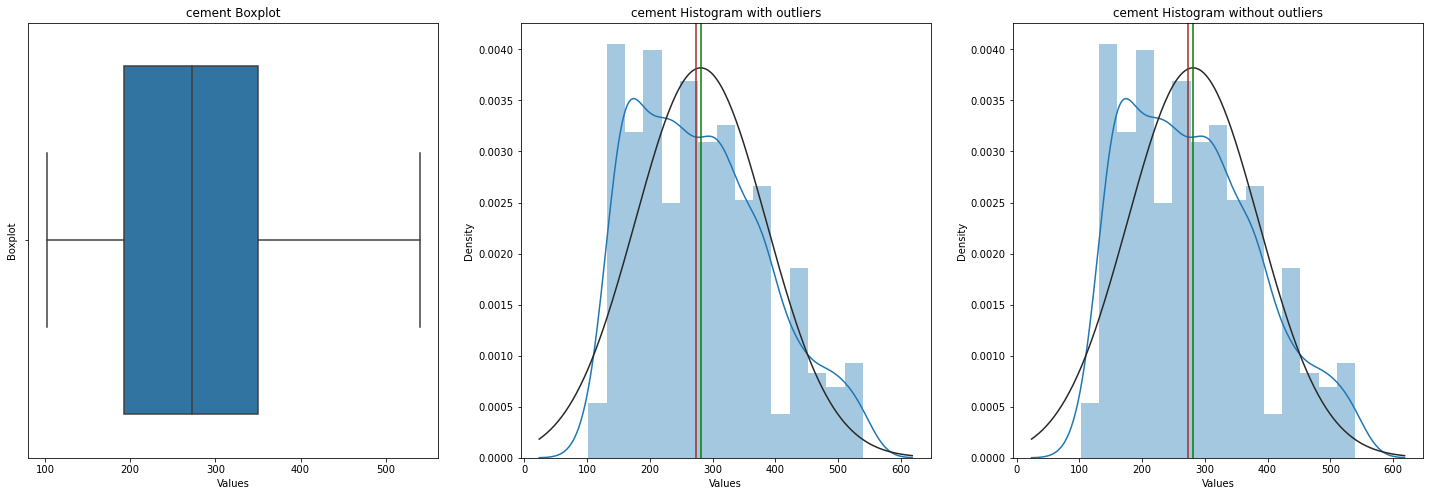

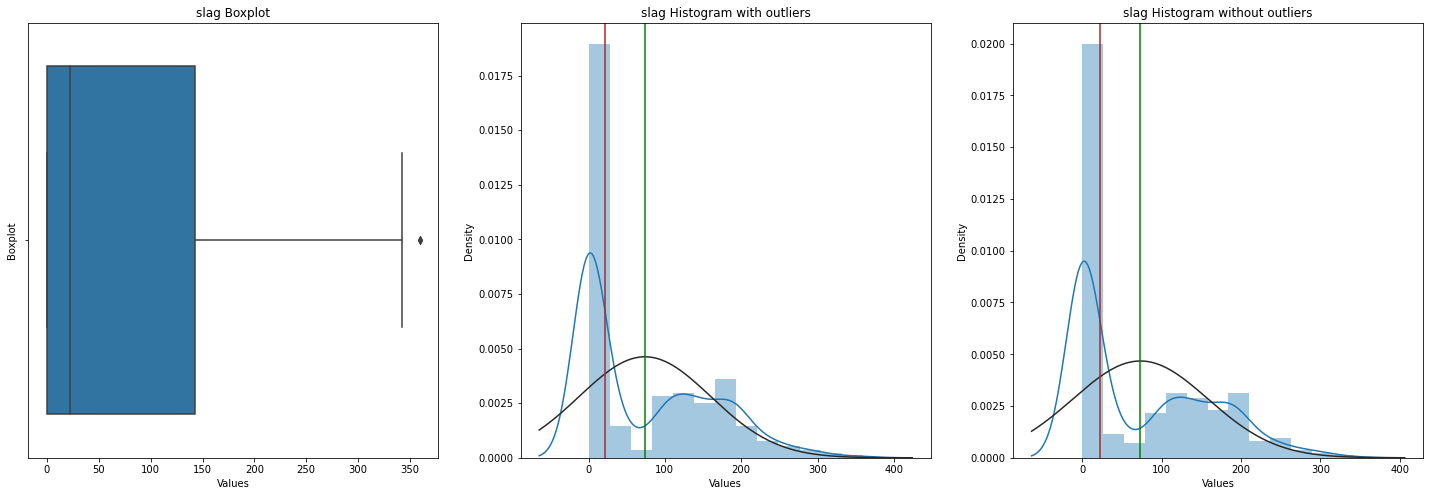

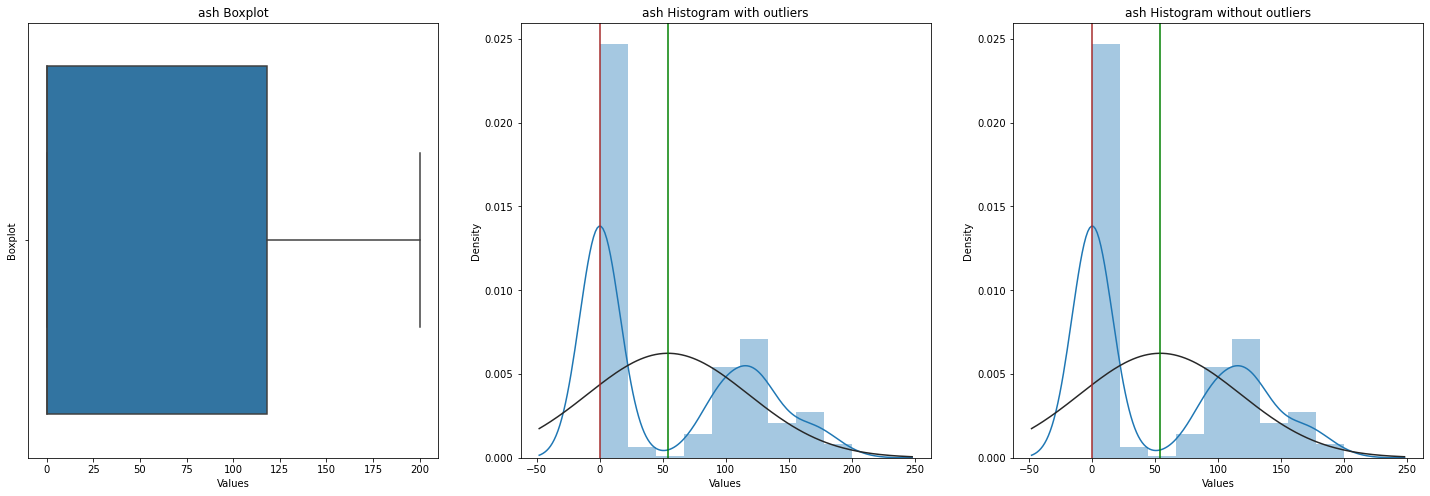

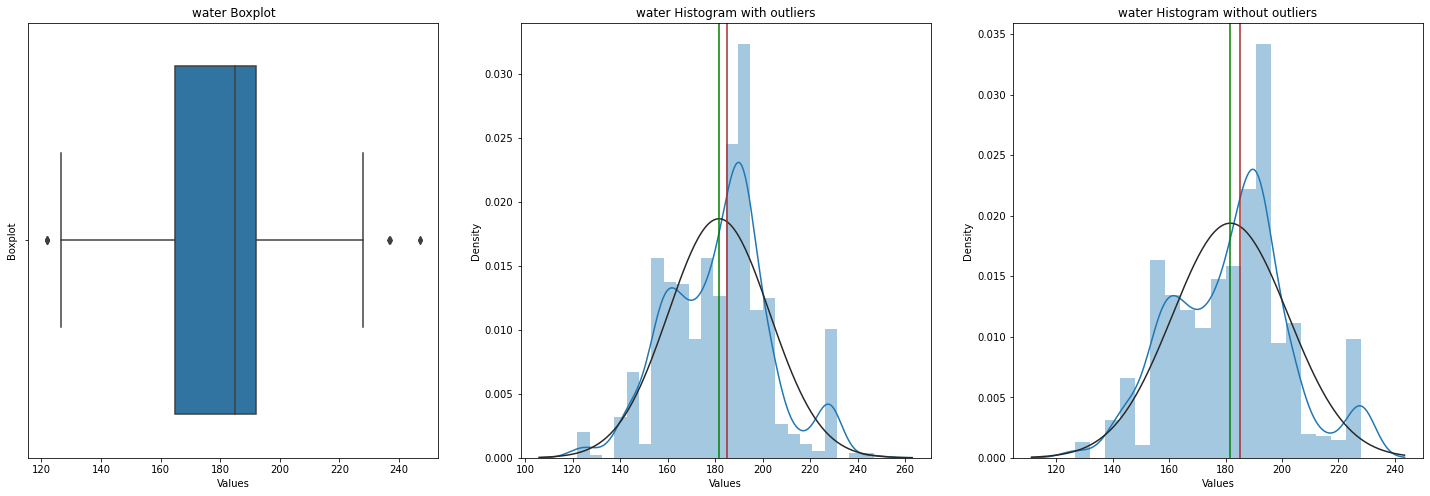

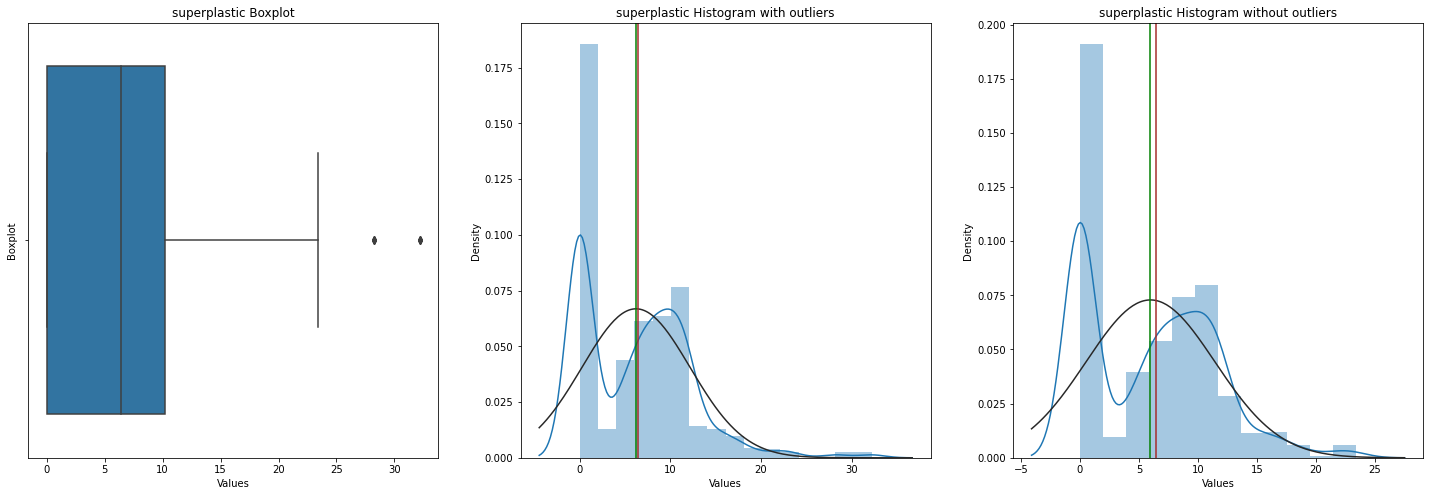

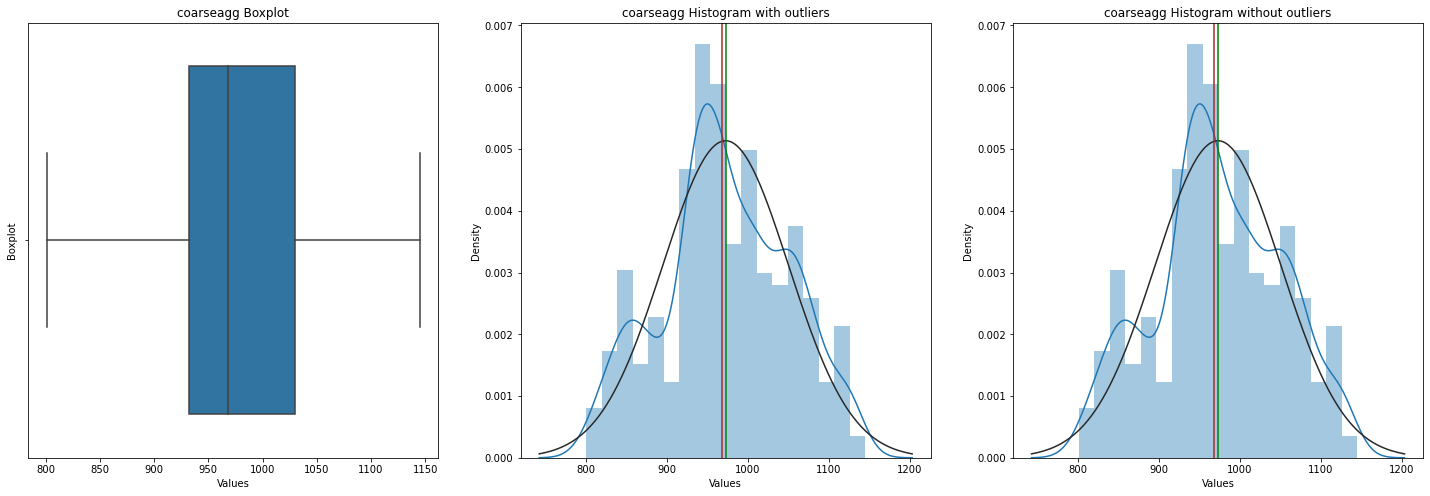

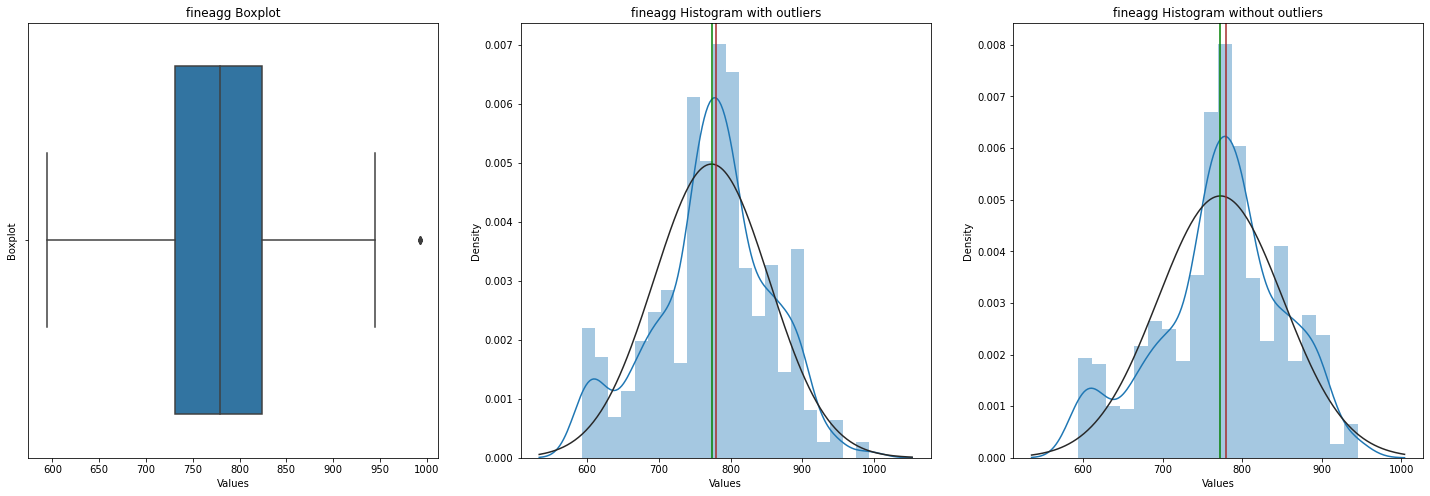

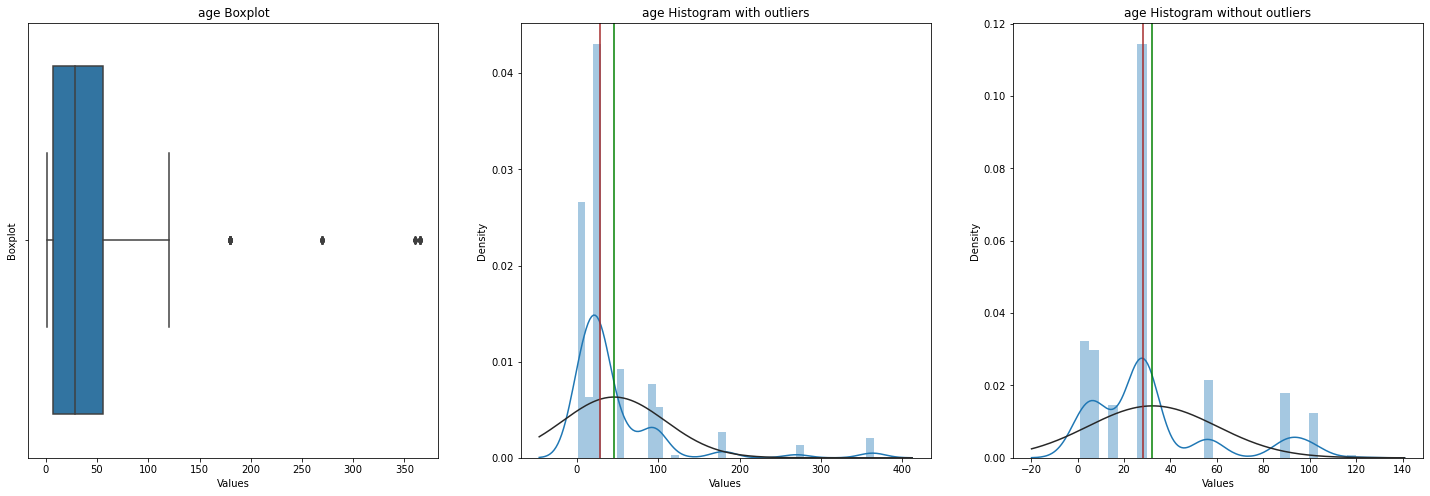

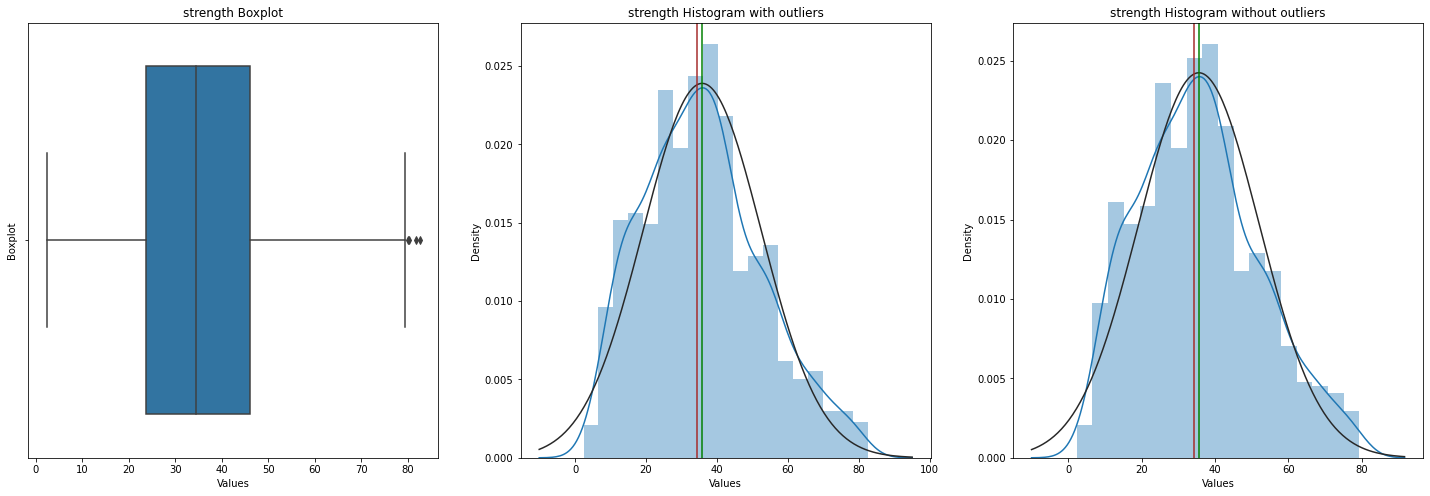

In [10]:
for col in df.columns:
    odt_plots(df,col)

##  Mutlivariate Analysis using Regression

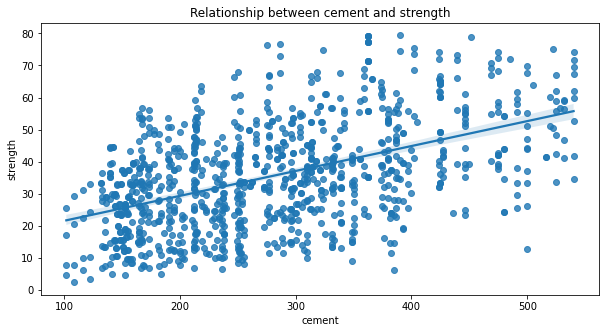

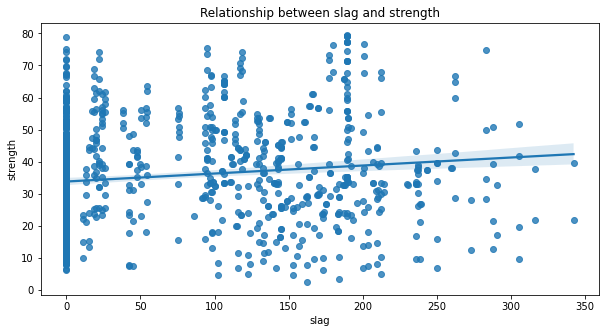

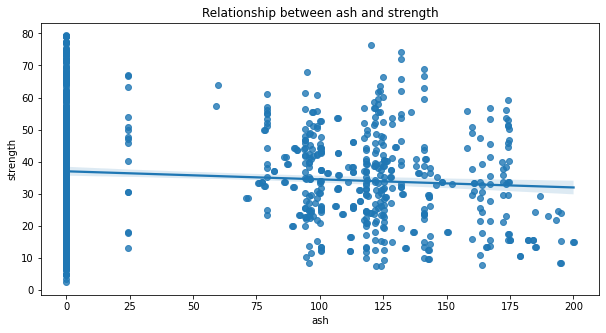

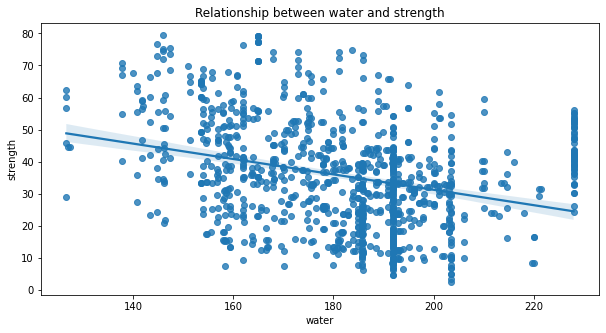

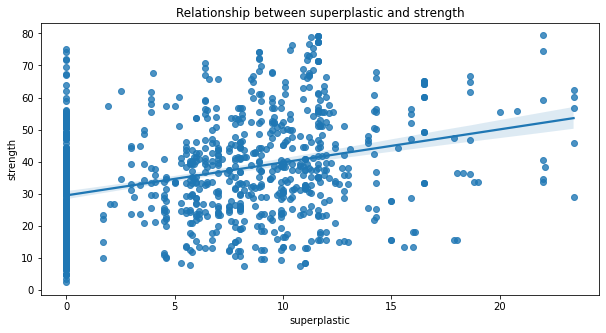

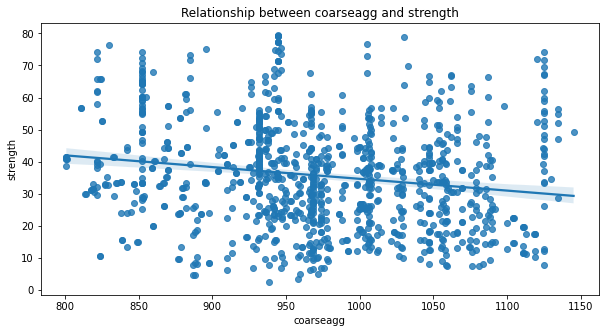

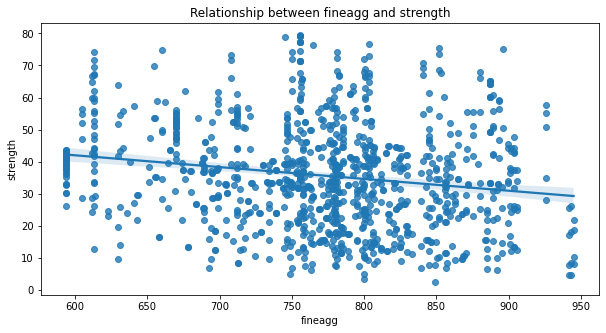

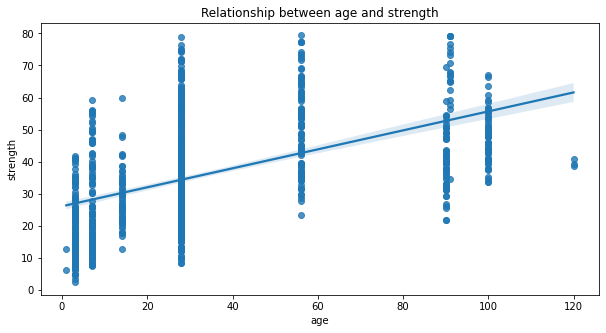

In [11]:
for col in df.columns:
    if col != 'strength':
        fig,ax1=plt.subplots(figsize=(10,5))
        sns.regplot(x=df[col],y=df['strength'],ax=ax1).set_title(f'Relationship between {col} and strength')

Analysis from Regression plots:
1. Strength and cement are highly positively correlated
2. Strength and slag are slightly positively correlated
3. Strength and ash are slightly negatively correlated
4. Strength and water are highly negatively correlated
5. Strength and superplastic are highly positively correlated
6. Strength and coarseagg are slighltly negatively correlated
7. Strength and fineagg are slighltly negatively correlated
8. Strength and age are highly positively correlated

## Multicollinearity Test
- Correlation Matrix/ HeatMap(Stage 1)

<AxesSubplot:>

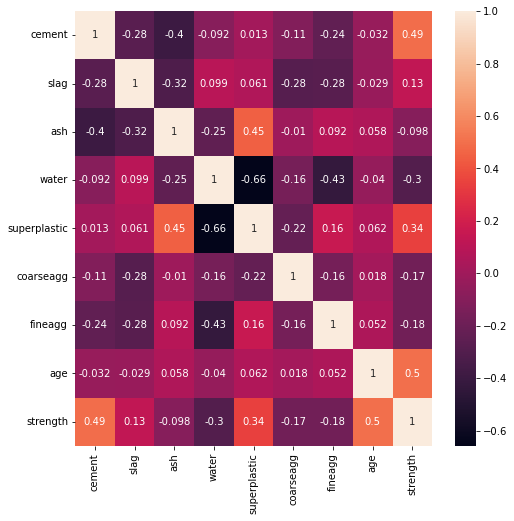

In [12]:
corr= df.corr()
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr,annot = True)

 Analysis / Results from stage 1 test:
 1. Slag has high correlation with ash.
 2. Ash has high correlation with cement, ash and superplastics.
 3. Water has high correlation with superplastics and fineagg.
 4. Superplastics has high correlation with ash and water.
 - Many features have correlation more than 30% so we can conclude from stage 1 results that there is a chance of multicollinearity in the data.

## Multicollinearity Test
- Variance inflation factor(VIF)(Stage 2)
- Formula for VIF is = 1 / (1-R2)
- Steps:
1. Regress every indepedent variable with each other and calculate the R2
2. Find VIF using above formula.
3. If VIF is more than 5 , we say that multicollinearity exists.


In [13]:
def VIF(my_df):
    vif = pd.DataFrame()
    vif['features'] = my_df.columns
    vif['vif'] = [variance_inflation_factor(my_df, i) for i in range(my_df.shape[1])]
    vif=vif.sort_values('vif',ascending=False)
    return vif

In [14]:
VIF(df.drop('strength', axis = 1))

,features,vif
5,coarseagg,86.938582
3,water,81.963087
6,fineagg,68.664404
0,cement,14.291158
4,superplastic,5.724145
2,ash,4.415840
1,slag,3.342314
7,age,2.368372


Analysis from stage 2 result:
- Five features have VIF more than 5, so we can conclude that multicollinearity exists in this data.

## Correlation with the target feature

In [15]:
def correlation_with_target(data,t_col):
    independent_variable = data.drop(t_col,axis=1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable, corr_result], index= ['Independent Variables', 'Correlation']).T
    result=result.sort_values('Correlation',ascending=False)
    return result

In [16]:
correlation_with_target(df,'strength')

,Independent Variables,Correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.097973
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


Analysis:
1. Age and cement have 49% correlation with strength.
2. Superplastic and water have 34% and 30% correlation with strength.

## Applying PCA to treat Multicollinearity

In [17]:
def custom_PCA(X):
    n_comp=len(X.columns)
    
    #Applying StandardScaler for Feature Scaling
    sc=StandardScaler()
    X=sc.fit_transform(X)
    
    for i in range(1,n_comp):
        pca=PCA(n_components=i)
        p_comp=pca.fit_transform(X)
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            pcs=i
            break
    print('Explained Variance ratio after PCA is: ', evr)
    #Creating a dataframe of principal components
    col=[]
    for j in range(1,pcs+1):
        col.append('PC_'+str(j))
    pca_df=pd.DataFrame(p_comp,columns=col)
    return pca_df

In [18]:
pca_df = custom_PCA(df.drop('strength', axis=1))

Explained Variance ratio after PCA is:  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [19]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228


### Joining PCA features with Target Features

In [20]:
pca_df = pca_df.join(df['strength'], how = 'left')

In [21]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC_1      1030 non-null   float64
 1   PC_2      1030 non-null   float64
 2   PC_3      1030 non-null   float64
 3   PC_4      1030 non-null   float64
 4   PC_5      1030 non-null   float64
 5   PC_6      1030 non-null   float64
 6   strength  1030 non-null   float64
dtypes: float64(7)
memory usage: 56.5 KB


In [22]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [23]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29


## Model Building
- Custom train-test-split
- Cross Validation
- Hyperparameter Tuning

In [24]:
def train_and_test_split(data,t_col,testsize=0.3,randomstate=1):
    X=data.drop(t_col,axis=1)
    y=data[t_col]
    return train_test_split(X,y,test_size=testsize,random_state=randomstate)

In [25]:

def model_builder(model_name,model,data,t_col):
    X_train,X_test,y_train,y_test=train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    result=[model_name,rmse,r2]
    return result

In [26]:
model_builder(model_name='LinearRegression',model=LinearRegression(),data=pca_df,t_col='strength')

['LinearRegression', 10.263206842646461, 0.6290862546729372]

In [27]:
def multiple_models(data,t_col):
    col_names=['Model Name','RMSE','R2 Score']
    result=pd.DataFrame(columns=col_names)
    result.loc[len(result)]=model_builder('Linear Regression',LinearRegression(),data,t_col)
    result.loc[len(result)]=model_builder('Lasso Regression',Lasso(),data,t_col)
    result.loc[len(result)]=model_builder('Ridge Regression',Ridge(),data,t_col)
    result.loc[len(result)]=model_builder('Decision Tree Regression',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)]=model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)]=model_builder('Randm Forest',RandomForestRegressor(),data,t_col)
    result.loc[len(result)]=model_builder('KNNR',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)]=model_builder('GBoost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)]=model_builder('XGBoost',XGBRegressor(),data,t_col)
    result.loc[len(result)]=model_builder('AdaBoost',AdaBoostRegressor(),data,t_col)
    result=result.sort_values('R2 Score',ascending=False)
    return result

In [28]:
multiple_models(pca_df,'strength')

,Model Name,RMSE,R2 Score
5,Randm Forest,6.549660,0.848942
8,XGBoost,6.681037,0.842821
7,GBoost,7.399542,0.807196
3,Decision Tree Regression,8.033904,0.772721
6,KNNR,8.154884,0.765824
9,AdaBoost,8.778289,0.728652
4,SVR,9.507299,0.681711
2,Ridge Regression,10.262450,0.629141
0,Linear Regression,10.263207,0.629086
1,Lasso Regression,10.482328,0.613079


In [29]:
def k_fold_cv(X,y,fold=10):
    score_LR=cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS=cross_val_score(Lasso(),X,y,cv=fold)
    score_Rg=cross_val_score(Ridge(),X,y,cv=fold)
    score_DTR=cross_val_score(DecisionTreeRegressor(),X,y,cv=fold)
    score_SVR=cross_val_score(SVR(),X,y,cv=fold)
    score_Random=cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_KNNR=cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_GB=cross_val_score(GradientBoostingRegressor(),X,y,cv=fold)
    score_XGB=cross_val_score(XGBRegressor(),X,y,cv=fold)
    score_Ada=cross_val_score(AdaBoostRegressor(),X,y,cv=fold)
    
    model_name=['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','SVR','RandomForestRegressor','KNNR','Gboost','XGBoost','AdaBoost']
    scores=[score_LR,score_LS,score_Rg,score_DTR,score_SVR,score_Random,score_KNNR,score_GB,score_XGB,score_Ada]
    result=[]
    for i in range(len(model_name)):
        score_mean=np.mean(scores[i])
        score_std=np.std(scores[i])
        m_name=model_name[i]
        temp=[m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df=pd.DataFrame(result,columns=['Model Name','CV Accuracy','CV Std'])
    k_fold_df=k_fold_df.sort_values('CV Accuracy',ascending=False)
    return k_fold_df

In [30]:
k_fold_cv(pca_df.drop('strength',axis=1),pca_df['strength'])

,Model Name,CV Accuracy,CV Std
8,XGBoost,0.873262,0.036061
5,RandomForestRegressor,0.867202,0.032145
7,Gboost,0.828986,0.050116
6,KNNR,0.768176,0.056033
3,DecisionTreeRegressor,0.765058,0.060967
9,AdaBoost,0.724202,0.040663
4,SVR,0.703117,0.042765
2,Ridge,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso,0.649837,0.049887


## Hyperparameter Tuning

In [31]:
def tuning(X, y , fold = 10):
    
    #Parameters Grid for tuning
    param_LS = {'alpha' : [1e-15, 1e-13, 1e-11, 1e-9,1e-7, 1e-5,1e-3, 1e-1, 0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_KNN = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_DTR = {'max_depth' : [3,5,7,9,10,12,14,16] , 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
    param_SVR = {'gamma' : ['scale' , 'auto'], 'C' : [0.5 , 1]}
    param_ADB = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_XGB = {'eta' : [0.1,0.2,0.3,0.4,0.5], 'max_depth' : [3,5,7,9,10,12,14,15,16], 'gamma' : [0,10,20,30,40,50,60,70,80,90,100,200,300,400,500], 'reg_lambda' : [0,1]}
    param_RF = {'max_depth' : [3,5,7,8,9,10,12,14,16], 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
    
    #hyperparameter Tuning
    tune_LS = GridSearchCV(Lasso(), param_LS, cv = fold)
    tune_Rg = GridSearchCV(Ridge(), param_LS , cv = fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor() , param_KNN , cv = fold)
    tune_DT = GridSearchCV(DecisionTreeRegressor(), param_DTR , cv = fold)
    tune_SVR = GridSearchCV(SVR(), param_SVR , cv = fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor() , param_ADB , cv = fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor() , param_GB , cv = fold)
    tune_XGB = GridSearchCV(XGBRegressor() , param_XGB , cv = fold)
    tune_RF = GridSearchCV(RandomForestRegressor() , param_RF , cv = fold)
    
    #Fitting X and Y
    tune_LS.fit(X,y)
    tune_Rg.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DT.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)
    
    tune = [tune_LS, tune_Rg, tune_KNN, tune_DT, tune_SVR, tune_ADB, tune_GB, tune_XGB, tune_RF]
    models = ['Lasso', 'Ridge', 'KNNR' , 'DTR', 'SVR' , 'ADBR', 'GBR', 'XGBR' , 'RFR']
    
    for i in range(len(tune)):
        print('models:', models[i])
        print('best parameters :', tune[i].best_params_)
    

In [32]:
#tuning(pca_df.drop('strength', axis = 1), pca_df['strength'])

### Cross Validation post hyperparameter tuning 

In [33]:
def cv_post_hpt(X,y,fold=10):
    score_LR=cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS=cross_val_score(Lasso(alpha=0.1),X,y,cv=fold)
    score_Rg=cross_val_score(Ridge(alpha=6),X,y,cv=fold)
    score_DTR=cross_val_score(DecisionTreeRegressor(max_depth=12,max_features=4),X,y,cv=fold)
    score_SVR=cross_val_score(SVR(C=1, gamma='scale'),X,y,cv=fold)
    score_Random=cross_val_score(RandomForestRegressor(max_depth=16, max_features=3),X,y,cv=fold)
    score_KNNR=cross_val_score(KNeighborsRegressor(n_neighbors=4),X,y,cv=fold)
    score_GB=cross_val_score(GradientBoostingRegressor(alpha=0.5),X,y,cv=fold)
    score_XGB=cross_val_score(XGBRegressor(eta=0.2, gamma=0, max_depth=5, reg_lambda=0),X,y,cv=fold)
    score_Ada=cross_val_score(AdaBoostRegressor(learning_rate=0.9),X,y,cv=fold)
    
    model_name=['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','SVR','RandomForestRegressor','KNNR','Gboost','XGBoost','AdaBoost']
    scores=[score_LR,score_LS,score_Rg,score_DTR,score_SVR,score_Random,score_KNNR,score_GB,score_XGB,score_Ada]
    result=[]
    for i in range(len(model_name)):
        score_mean=np.mean(scores[i])
        score_std=np.std(scores[i])
        m_name=model_name[i]
        temp=[m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df=pd.DataFrame(result,columns=['Model Name','CV Accuracy','CV Std'])
    k_fold_df=k_fold_df.sort_values('CV Accuracy',ascending=False)
    return k_fold_df

In [34]:
cv_post_hpt(pca_df.drop('strength', axis = 1), pca_df['strength'])

,Model Name,CV Accuracy,CV Std
8,XGBoost,0.879316,0.036140
5,RandomForestRegressor,0.868778,0.033090
7,Gboost,0.828817,0.050710
6,KNNR,0.770723,0.054643
3,DecisionTreeRegressor,0.761564,0.048039
9,AdaBoost,0.724087,0.031912
4,SVR,0.703117,0.042765
1,Lasso,0.664143,0.058426
2,Ridge,0.663951,0.059242
0,Linear Regression,0.663928,0.059476


## Clustering
- using K-means clustering to check if accuracy can be improved any further.

<AxesSubplot:xlabel='cement', ylabel='strength'>

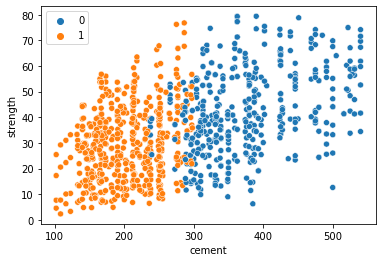

In [35]:
kmeans = KMeans(n_clusters = 2, random_state = 8)
clusters = kmeans.fit_predict(df.drop('strength', axis = 1))
sns.scatterplot(x = df['cement'], y = df['strength'], hue = clusters)

In [36]:
def clustering(X, t_col, clusters):
    column = list(set(X.columns) - set(['strength']))
    r = int(len(column) / 2 )
    if len(column) % 2 == 0:
        r = r
    else:
        r += 1
    
    f, ax = plt.subplots(r,2, figsize = (15,15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a != len(column):
                ax[row][col].scatter(X[t_col], X[column[a]], c = clusters)
                ax[row][col].set_xlabel(t_col)
                ax[row][col].set_ylabel(column[a])
                a += 1

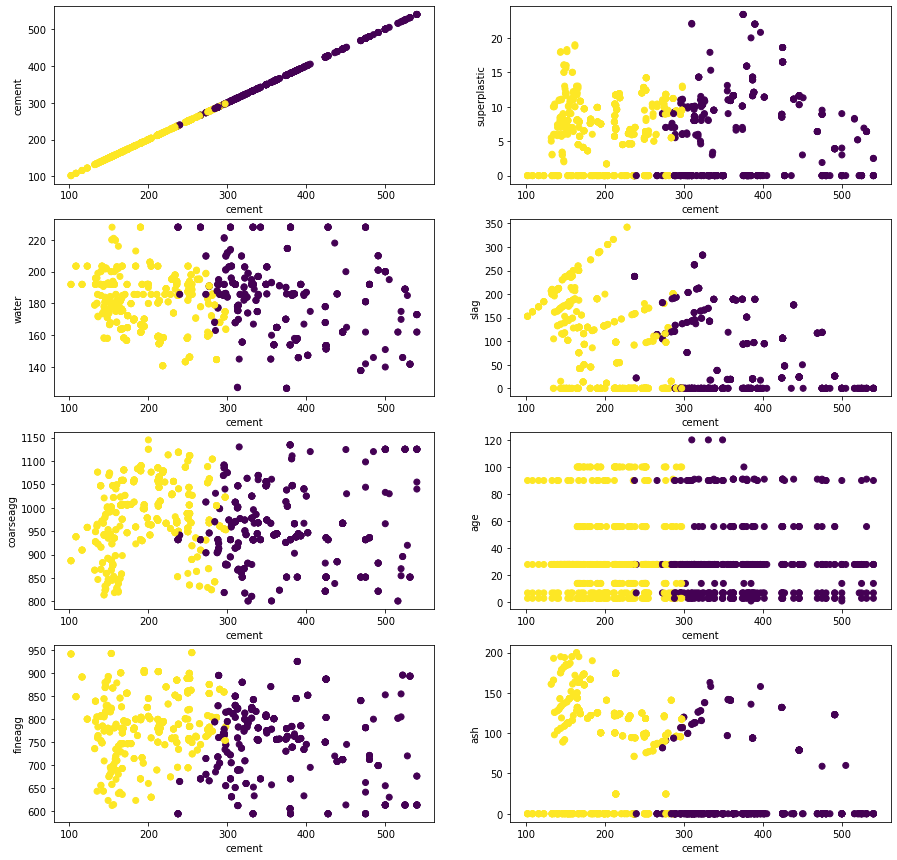

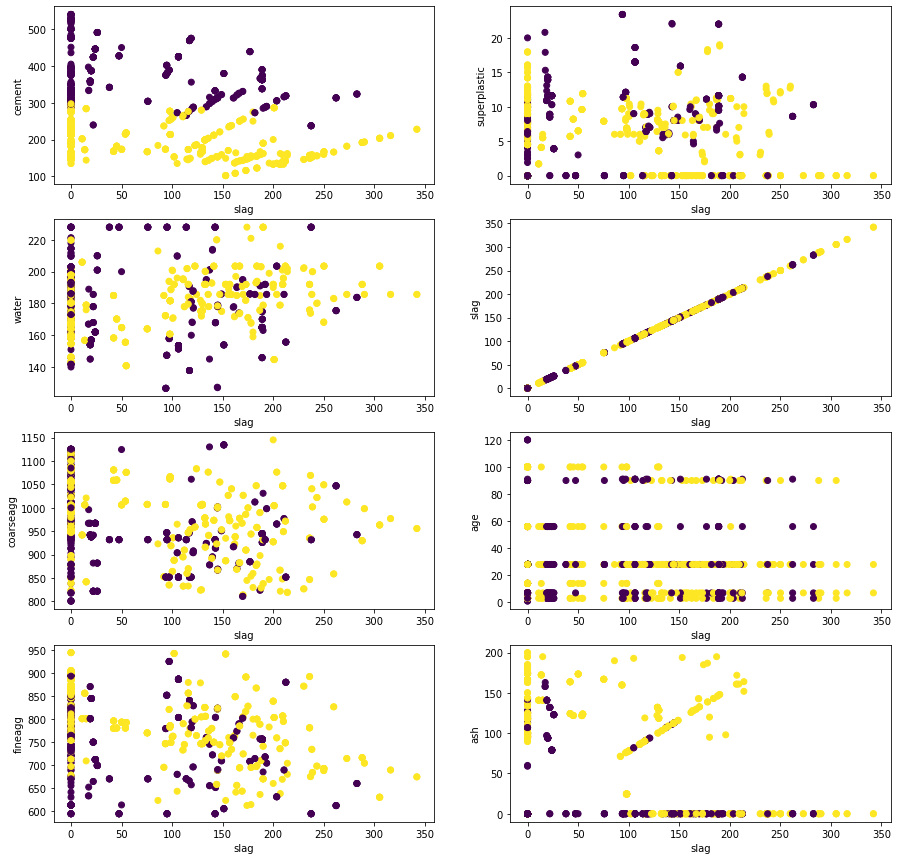

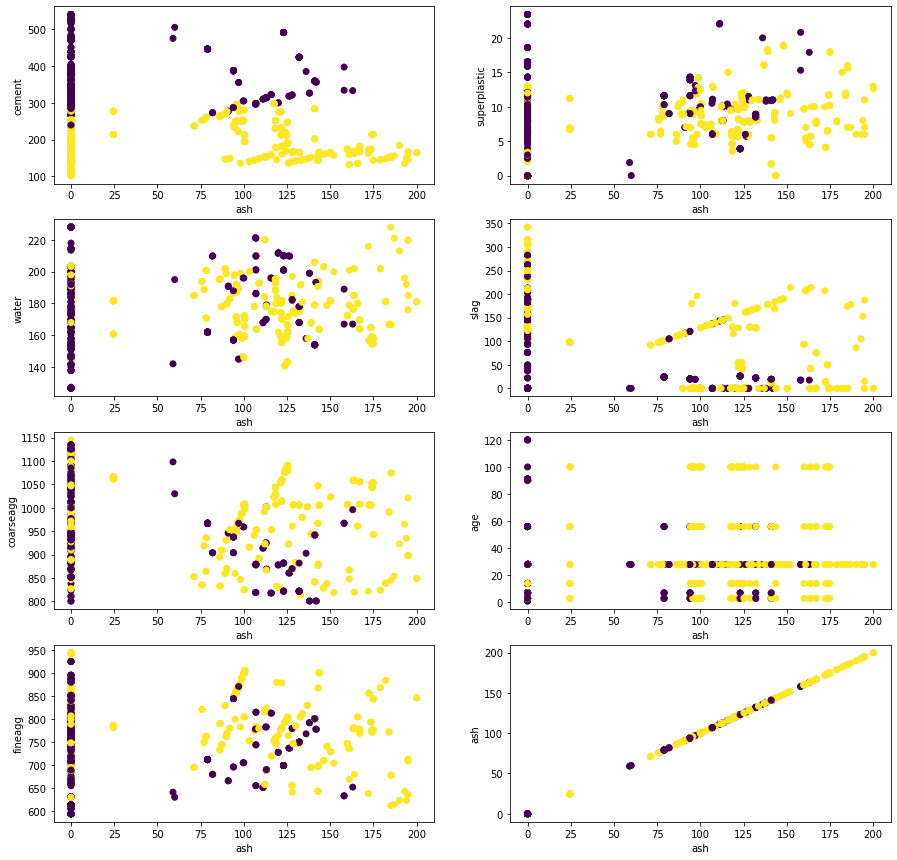

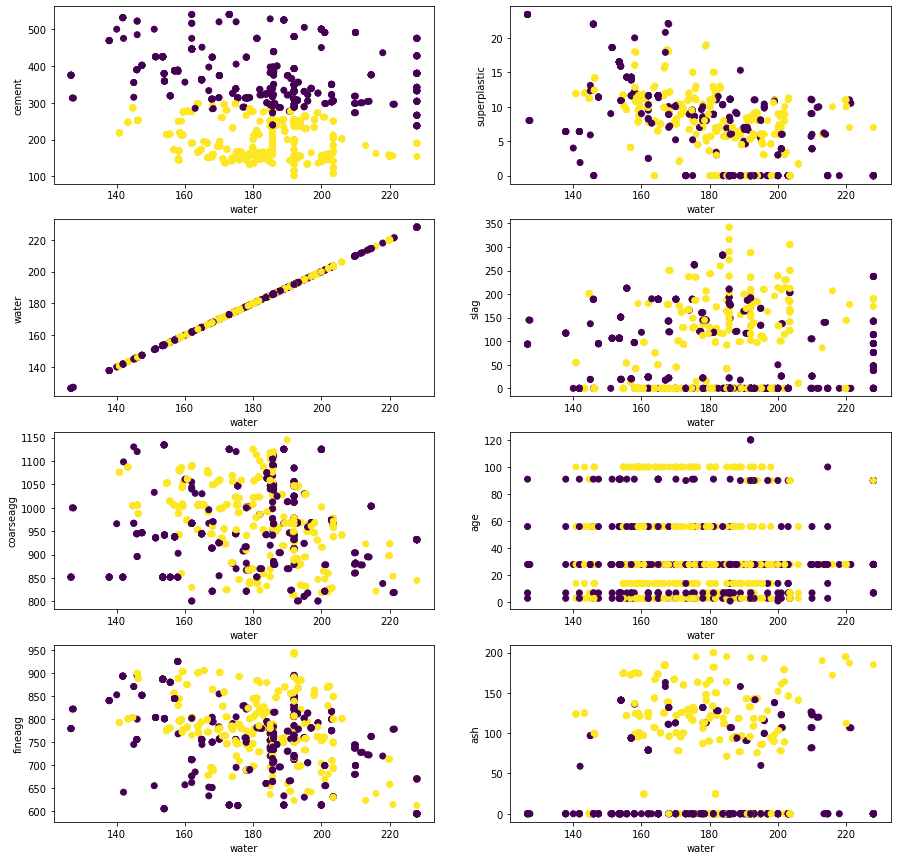

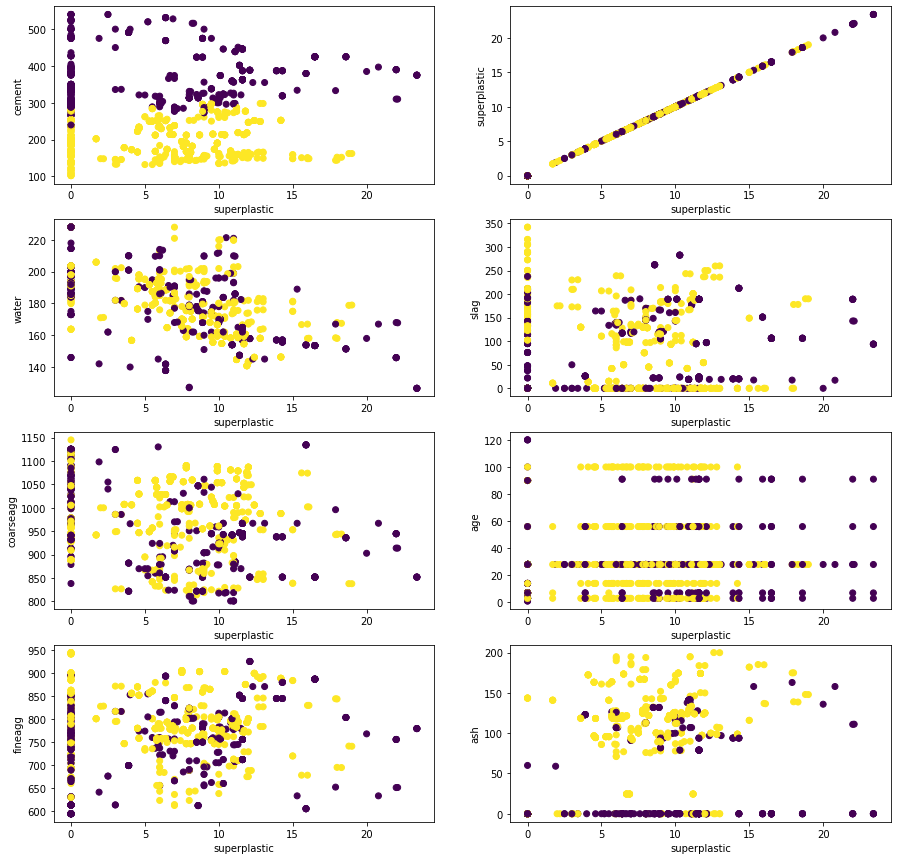

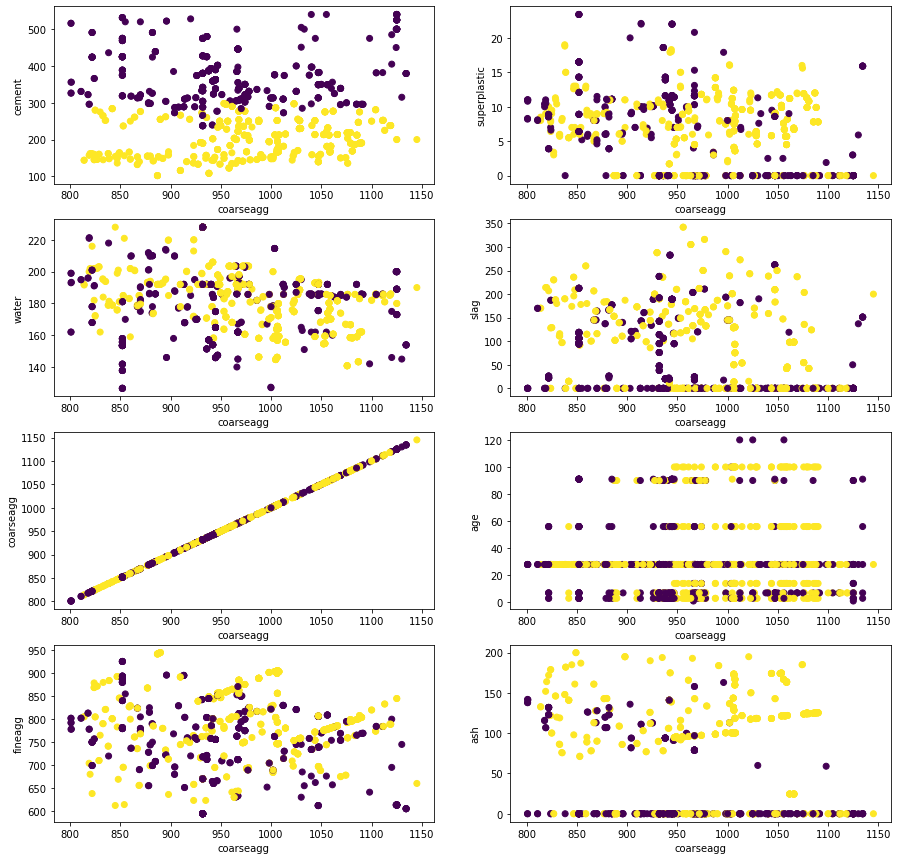

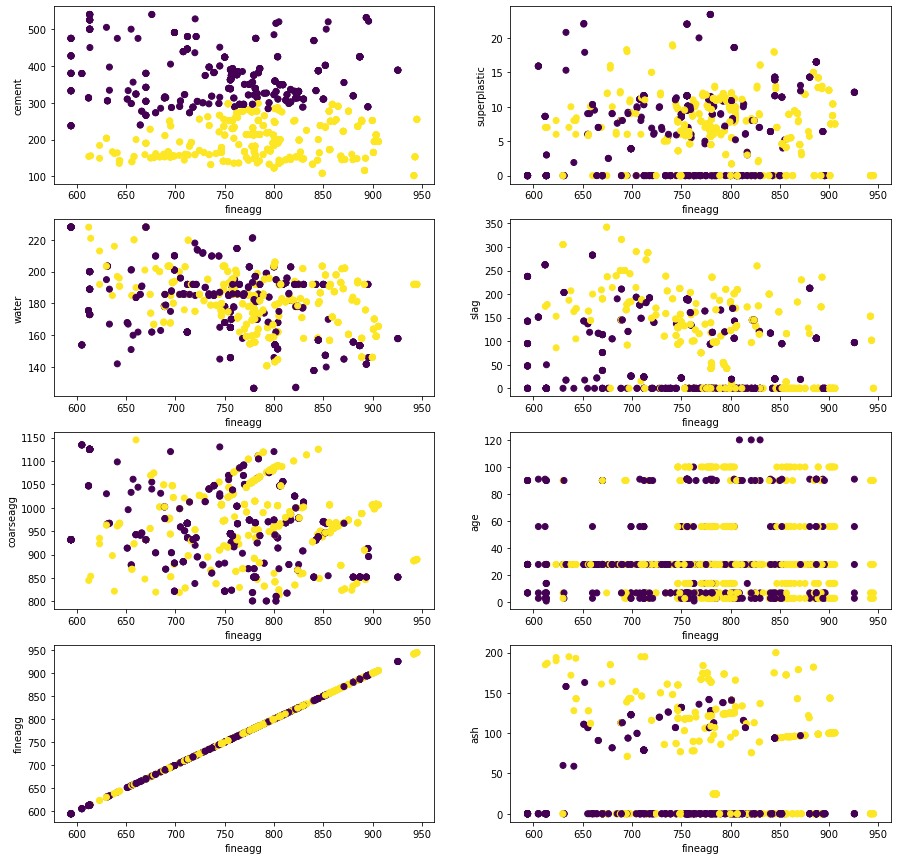

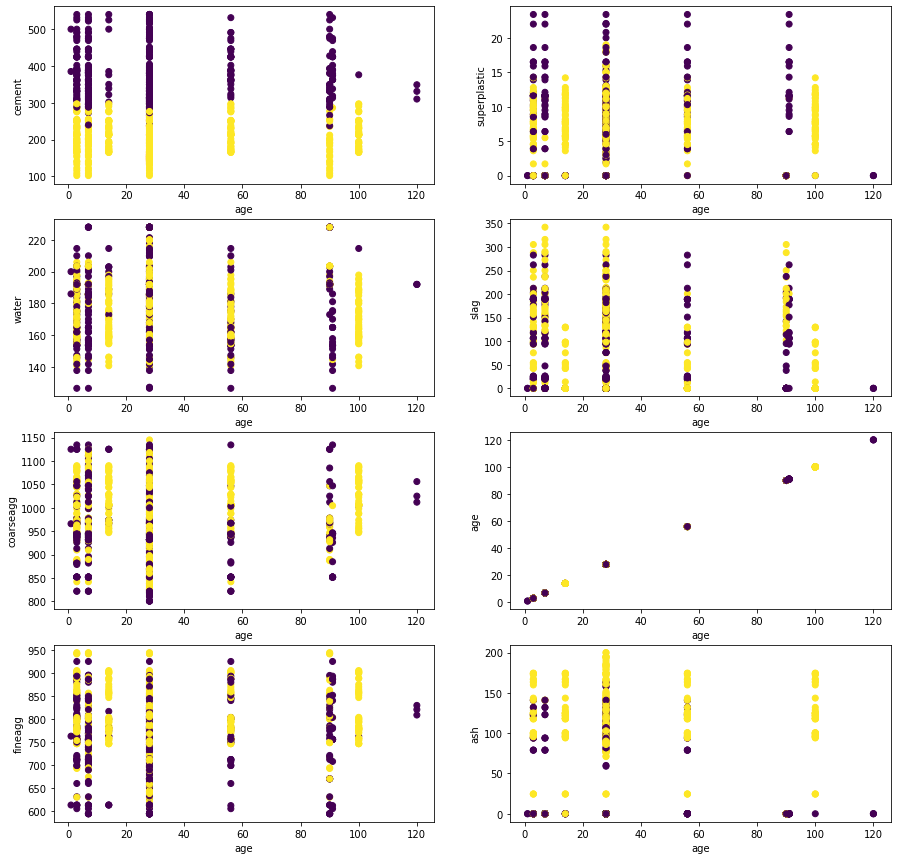

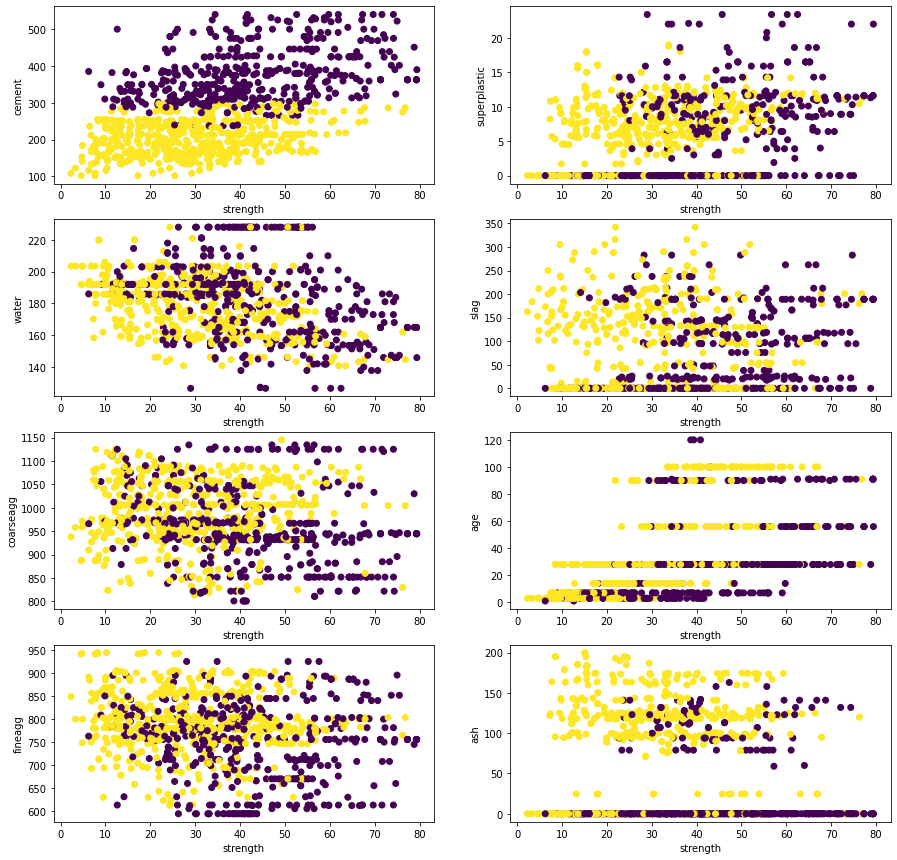

In [37]:
for col in df.columns:
    clustering(df,col,clusters)

Analysis:
- Cement is forming clusters with all other independent variables.

In [38]:
new_df=df.join(pd.DataFrame(clusters,columns=['clusters']),how='left')

In [39]:
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


In [40]:
new_df['clusters'].value_counts()

1    557
0    473
Name: clusters, dtype: int64

In [41]:
clusters_agg=new_df.groupby('clusters')['cement'].agg(['mean','median'])  #cement forms clear clusters with every other 
                    #independent variable so we choose cement as its mean and median will represent that cluster clearly
clusters_agg

,mean,median
clusters,,
0,374.104017,362.6
1,202.247217,200.0


In [42]:
cluster_df=new_df.merge(clusters_agg,on='clusters',how='left')
cluster_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,202.247217,200.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,202.247217,200.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1,202.247217,200.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0,374.104017,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,202.247217,200.0


In [43]:
multiple_models(cluster_df.drop('clusters',axis=1),'strength')

,Model Name,RMSE,R2 Score
8,XGBoost,5.708748,0.885241
5,Randm Forest,5.908513,0.877069
7,GBoost,6.179249,0.865545
3,Decision Tree Regression,7.563879,0.798537
9,AdaBoost,8.475106,0.747072
1,Lasso Regression,9.773186,0.663660
0,Linear Regression,9.797009,0.662018
2,Ridge Regression,9.799443,0.661850
6,KNNR,10.114908,0.639728
4,SVR,14.844049,0.224090


In [44]:
X=cluster_df.drop(['strength','clusters'],axis=1)
y=cluster_df['strength']
k_fold_cv(X,y)

,Model Name,CV Accuracy,CV Std
8,XGBoost,0.901949,0.042320
5,RandomForestRegressor,0.887396,0.035747
7,Gboost,0.875734,0.045999
3,DecisionTreeRegressor,0.831325,0.057132
9,AdaBoost,0.740972,0.033761
2,Ridge,0.686680,0.062293
1,Lasso,0.686443,0.062370
0,Linear Regression,0.686366,0.062365
6,KNNR,0.668523,0.087232
4,SVR,0.245706,0.044065


In [45]:
cv_post_hpt(X,y)

,Model Name,CV Accuracy,CV Std
8,XGBoost,0.896762,0.047155
5,RandomForestRegressor,0.890556,0.032096
7,Gboost,0.875894,0.046113
3,DecisionTreeRegressor,0.811285,0.054690
9,AdaBoost,0.745607,0.036916
2,Ridge,0.686681,0.062294
1,Lasso,0.686681,0.062296
0,Linear Regression,0.686366,0.062365
6,KNNR,0.679919,0.080059
4,SVR,0.245706,0.044065


## Understanding Feature Importance using XGBoost

In [46]:
X_train,X_test,y_train,y_test=train_and_test_split(cluster_df.drop(['clusters'],axis=1),'strength')

In [47]:
Xgb=XGBRegressor()
Xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

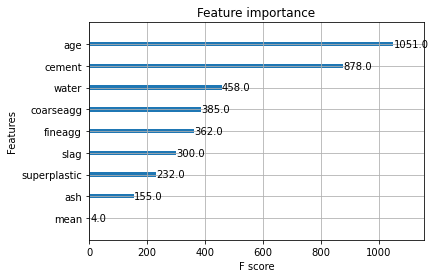

In [48]:
xgboost.plot_importance(Xgb)

Analysis on XGBoost Feature Importance
- Age and Cement are the 2 most important features for predicting strength of the mixture.

In [49]:
imp_features=cluster_df[['age','cement','water','coarseagg','fineagg','strength']]

In [50]:
cv_post_hpt(imp_features.drop('strength',axis=1),imp_features['strength'])

,Model Name,CV Accuracy,CV Std
8,XGBoost,0.887750,0.038153
5,RandomForestRegressor,0.871631,0.029349
7,Gboost,0.841711,0.040705
3,DecisionTreeRegressor,0.774998,0.068967
9,AdaBoost,0.700404,0.026471
1,Lasso,0.657583,0.060431
2,Ridge,0.657579,0.060465
0,Linear Regression,0.657579,0.060465
6,KNNR,0.652519,0.088818
4,SVR,0.252828,0.044987


## Building Learning Curve Analysis

In [51]:
def generate_learning_curve(model_name,estimator,X,y):
    train_size,train_score,test_score=learning_curve(estimator=estimator,X=X,y=y,cv=10)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,c='blue')
    plt.plot(train_size,test_score_mean,c='red')
    plt.ylabel('R2 Score')
    plt.xlabel('Samples')
    plt.title('Learning Curve for '+ model_name)
    plt.legend(('Training R2 Score,Testing R2 Score'))

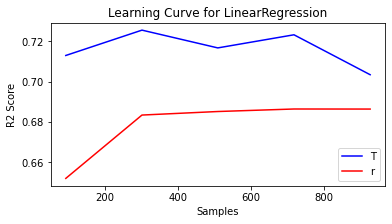

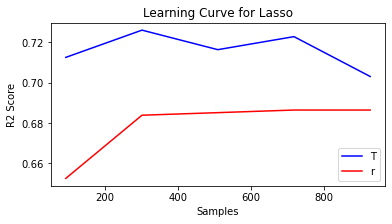

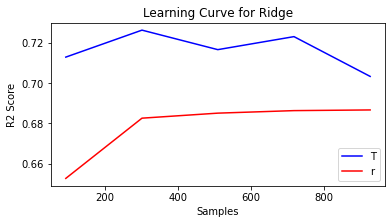

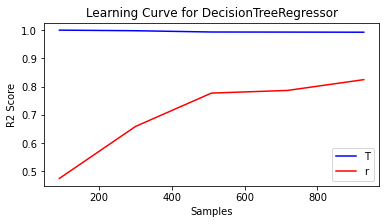

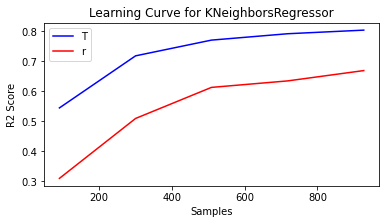

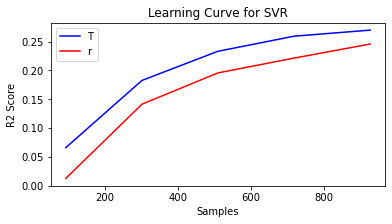

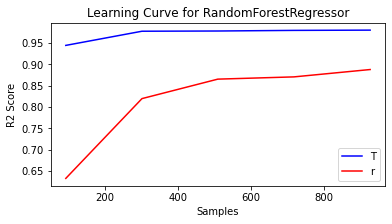

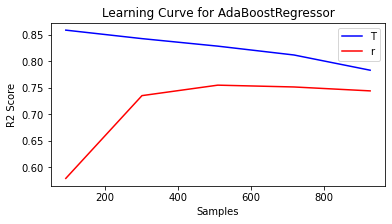

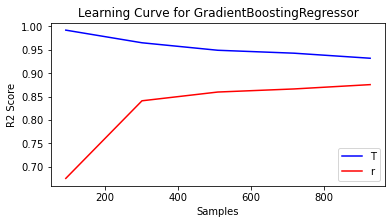

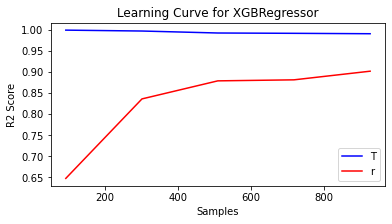

In [52]:
models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),
            AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
for a,model in enumerate(models):
    fg=plt.figure(figsize=(6,3))
    ax=fig.add_subplot(10,1,a+1)
    generate_learning_curve(type(models[a]).__name__,model,cluster_df.drop(['clusters','strength'],axis=1),cluster_df['strength'])

Analysis from Learning Curve:
- XGBoost and GBoost is giving good training and testing accuracy when sample size is increasing.
- In Decision Tree, training score is close to 100% which may indicate overfitting.
- SVR training and testing accuracies are poor.
- Random Forest is giving good training and testing accuracy but it might show slight overfitting.